<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:25px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> 📝 Customer Purchase Prediction for Paid Product Version 📝</b></div>

In [64]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
md=pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\Python\modeldata.csv")

In [66]:
md.head()

,id,extract_date,skill,job,purpose,target_group,business_group,business_segment,signup_source,signup_category,first_cc_subscription_dts,country_code,product_id,download_attempts,product_platforms,machines,error_codes,label
0,0002e93c8519f24cc642ca462ef49956,10/1/2017,BEGINNER,ACADEMIC,ME_PROFESSIONAL,HED - ED/FAC/STAFF,EDUCATION,EDU STUDENT STAFF,Creative Cloud,DESKTOP,3/12/2017 11:44,US,PHSP:APRO,2.0,MAC,1.0,NaN,0
1,0003b2d98410d0350070961653b8c3bc,10/1/2017,BEGINNER,ACADEMIC,ME_PROFESSIONAL,EDGEN - AD/ED/FAC/STAFF,EDUCATION,EDU STUDENT STAFF,Renga Auto Provisioning,DESKTOP,5/29/2017 15:35,US,APRO,1.0,WIN,0.0,NaN,0
2,00093099e0d8d7c3d60a22e2883ad63d,10/1/2017,BEGINNER,NaN,NaN,HOBBYIST,HOBBYIST,PHOTO,Draw (iOS),MOBILE,6/10/2017 1:04,US,ILST:PHSP,3.0,MAC:WIN,1.0,NaN,0
3,000eb7f4b843c451d98a249e85328b05,10/1/2017,BEGINNER,STUDENT,ME_NONPROFESSIONAL,EDGEN - STUDENT,EDUCATION,EDU STUDENT STAFF,Renga Auto Provisioning,DESKTOP,1/21/2017 18:33,US,PPRO:AME,2.0,WIN,1.0,NaN,0
4,001134540564124eb2f767cb0905053c,10/1/2017,BEGINNER,STUDENT,ME_PROFESSIONAL,EDGEN - STUDENT,EDUCATION,EDU STUDENT STAFF,Renga Auto Provisioning,DESKTOP,6/23/2017 14:46,US,IDSN,1.0,MAC,0.0,NaN,0


In [67]:
md.shape

(308948, 18)

In [68]:
# Dropping Unnecessary Columns

md=md.drop(["id"],axis=1)    
md=md.drop(["error_codes"],axis=1)    # having high numbers of nulls
md=md.drop(["extract_date"],axis=1)   # unique colmn having only one date

In [69]:
#Checking for nulls

null_percentage = md.isnull().sum()*100//md.shape[0]
null_percentage[null_percentage>0]

job                  53
purpose              53
product_id           36
download_attempts    36
product_platforms    36
machines             36
dtype: int64

In [70]:
# Working on Null Values

md['job'].fillna("OTHER", inplace =True)
md['purpose'].fillna("ME_PROFESSIONAL", inplace =True)
md['download_attempts'].fillna(md['download_attempts'].median(), inplace =True)
md['product_platforms'].fillna("WIN", inplace =True)
md['machines'].fillna(md['machines'].median(), inplace =True)

In [71]:
# Replacing Categorical Values with Numerical Codes in a DataFrame

md.skill.replace({'BEGINNER':3, 'UNKNOWN':5, 'INTERMEDIATE':2, 'EXPERIENCED':1, 'MIXED':4},inplace=True)
md.purpose.replace({'ME_PROFESSIONAL':3, 'ME_NONPROFESSIONAL':2, 'ORG_INVOLVED':4,'ORG_NOTINVOLVED':5, 'UNEXPECTEDVALUE':1},inplace=True)
md.signup_category.replace({'DESKTOP':2, 'MOBILE':1, 'SERVICE':3, 'MAPPING TBD':5, 'CREATIVE SDK':4},inplace=True)
md.product_platforms.replace({'MAC':2, 'WIN':1, 'MAC:WIN':3, 'other':4},inplace=True)

In [72]:
# transforms them into numeric values

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

md.job             =le.fit_transform(md.job)
md.target_group    =le.fit_transform(md.target_group)
md.business_group  =le.fit_transform(md.business_group)
md.business_segment=le.fit_transform(md.target_group)
md.signup_source   =le.fit_transform(md.business_group)
md.target_group    =le.fit_transform(md.target_group)
md.country_code    =le.fit_transform(md.country_code)
md.product_id      =le.fit_transform(md.product_id)

In [73]:
# Convert to DateTime
md['first_cc_subscription_dts'] = pd.to_datetime(md['first_cc_subscription_dts'])

# Example: Extract year and month, day ,time and making new column

md['first_cc_sub_month']        = md['first_cc_subscription_dts'].dt.month
md['first_cc_sub_day']          = md['first_cc_subscription_dts'].dt.day_name()

md['first_cc_sub_time']         = (md['first_cc_subscription_dts']).dt.time
md['first_cc_sub_time']         = md['first_cc_subscription_dts'].astype(str)

md['first_cc_sub_24_hours']     = (md['first_cc_subscription_dts']).dt.hour



In [74]:
pd.set_option("display.max_columns",None)
md.head()

,skill,job,purpose,target_group,business_group,business_segment,signup_source,signup_category,first_cc_subscription_dts,country_code,product_id,download_attempts,product_platforms,machines,label,first_cc_sub_month,first_cc_sub_day,first_cc_sub_time,first_cc_sub_24_hours
0,3,0,3,17,5,17,5,2,2017-03-12 11:44:00,38,24327,2.0,2,1.0,0,3,Sunday,2017-03-12 11:44:00,11
1,3,0,3,12,5,12,5,2,2017-05-29 15:35:00,38,7312,1.0,1,0.0,0,5,Monday,2017-05-29 15:35:00,15
2,3,6,3,19,6,19,6,1,2017-06-10 01:04:00,38,17506,3.0,3,1.0,0,6,Saturday,2017-06-10 01:04:00,1
3,3,10,2,13,5,13,5,2,2017-01-21 18:33:00,38,28423,2.0,1,1.0,0,1,Saturday,2017-01-21 18:33:00,18
4,3,10,3,13,5,13,5,2,2017-06-23 14:46:00,38,12937,1.0,2,0.0,0,6,Friday,2017-06-23 14:46:00,14


In [75]:
md=md.drop(["product_id"],axis=1) 
md=md.drop(['first_cc_subscription_dts'],axis=1)
md=md.drop(["first_cc_sub_time"],axis=1)

In [76]:
#converting new day col into int

md.first_cc_sub_day.replace({'Sunday':7, 'Monday':1, 'Saturday':6, 'Friday':5, 'Tuesday':2, 'Thursday':4,
                             'Wednesday':3},inplace=True)

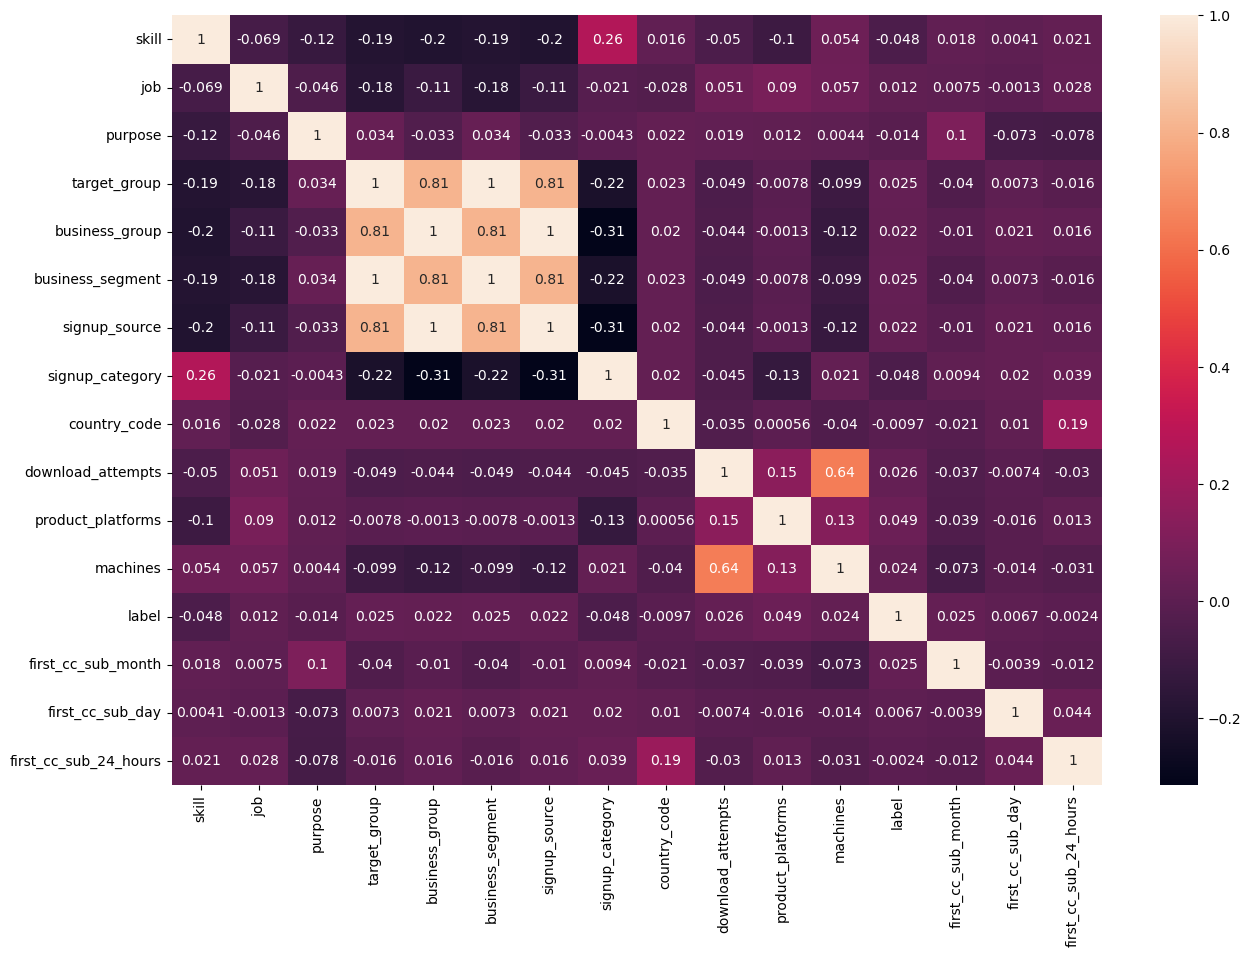

In [77]:
# checking any co-relation between any columns

plt.figure(figsize=(15,10))
sns.heatmap(md.corr(),annot=True);

## Sampling 

In [82]:
from sklearn.model_selection import train_test_split

In [145]:
md_train,md_test=train_test_split(md,test_size=.2,random_state=25)

# over sasmpling has to bone after sampling 

df1=md_train[md_train.label==1]# over samplin on class 1
md_train=pd.concat([md_train,df1,df1,df1,df1,df1,df1,df1,df1,df1,df1,df1,df1,]) # to ballance the class


md_train_x=md_train.drop(["label"],axis=1)
md_train_y=md_train.label


md_test_x=md_test.drop(["label"],axis=1)
md_test_y=md_test.label



In [146]:
# Supervised learning algorithm used

### 1.LOG REG 

In [147]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(md_train_x,md_train_y)
pred_logreg=logreg.predict(md_test_x)

In [148]:
from sklearn.metrics import confusion_matrix,classification_report

In [149]:
tab_logreg=confusion_matrix(md_test_y,pred_logreg)
tab_logreg

array([[50059,  8379],
       [ 2588,   764]], dtype=int64)

In [150]:
print(classification_report(md_test_y,pred_logreg))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90     58438
           1       0.08      0.23      0.12      3352

    accuracy                           0.82     61790
   macro avg       0.52      0.54      0.51     61790
weighted avg       0.90      0.82      0.86     61790



## 2.DecisionTree

In [151]:
 from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(class_weight="balanced",criterion="gini",max_depth=9,min_samples_split=25)

In [152]:
dt.fit(md_train_x,md_train_y)

DecisionTreeClassifier(class_weight='balanced', max_depth=9,
                       min_samples_split=25)

In [153]:
from sklearn.model_selection import GridSearchCV

In [154]:
Search_dict={'criterion':["gini","entropy"],
            'max_depth':range(5,10),
            "min_samples_split":range(25,30)}

In [155]:
grid=GridSearchCV(dt,param_grid=Search_dict)

In [156]:
grid.fit(md_train_x,md_train_y)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced',
                                              max_depth=9,
                                              min_samples_split=25),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 10),
                         'min_samples_split': range(25, 30)})

In [157]:
pred_dt=grid.predict(md_test_x)

In [158]:
confusion_matrix(md_test_y,pred_dt)

array([[34915, 23523],
       [ 1073,  2279]], dtype=int64)

In [159]:
print(classification_report(md_test_y,pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.60      0.74     58438
           1       0.09      0.68      0.16      3352

    accuracy                           0.60     61790
   macro avg       0.53      0.64      0.45     61790
weighted avg       0.92      0.60      0.71     61790



In [160]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 25}

## 3.ADABOST

In [161]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(dt,n_estimators=10)

In [162]:
abc.fit(md_train_x,md_train_y)

AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    max_depth=9,
                                                    min_samples_split=25),
                   n_estimators=10)

In [163]:
abc_pred=abc.predict(md_test_x)

In [164]:
# builduing Confussion matrix
tab_abc=confusion_matrix(md_test_y,abc_pred)
tab_abc=pd.DataFrame(tab_abc)
tab_abc.columns=['No',"Yes"]
tab_abc.indexex=['No',"Yes"]
tab_abc

,No,Yes
0,39807,18631
1,1432,1920


In [165]:
print(classification_report(md_test_y,abc_pred))

              precision    recall  f1-score   support

           0       0.97      0.68      0.80     58438
           1       0.09      0.57      0.16      3352

    accuracy                           0.68     61790
   macro avg       0.53      0.63      0.48     61790
weighted avg       0.92      0.68      0.76     61790



## 4.Random Forest

In [166]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(class_weight="balanced",criterion="gini",max_depth=9,min_samples_split=25)

In [167]:
rfc.fit(md_train_x,md_train_y)

RandomForestClassifier(class_weight='balanced', max_depth=9,
                       min_samples_split=25)

In [168]:
pred_rfc=rfc.predict(md_test_x)

In [169]:
confusion_matrix(md_test_y,pred_rfc)

array([[35378, 23060],
       [ 1052,  2300]], dtype=int64)

In [170]:
print(classification_report(md_test_y,pred_rfc))

              precision    recall  f1-score   support

           0       0.97      0.61      0.75     58438
           1       0.09      0.69      0.16      3352

    accuracy                           0.61     61790
   macro avg       0.53      0.65      0.45     61790
weighted avg       0.92      0.61      0.71     61790



## 5.Nave Baise

In [171]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [172]:
nb.fit(md_train_x,md_train_y)

MultinomialNB()

In [173]:
nb_pred=nb.predict(md_test_x)


In [174]:
tab_nb=confusion_matrix(md_test_y,nb_pred)
tab_nb=pd.DataFrame(tab_nb)
tab_nb.columns=['No',"Yes"]
tab_nb.indexex=['No',"Yes"]
tab_nb

,No,Yes
0,44317,14121
1,2208,1144


In [175]:
print(classification_report(md_test_y,nb_pred))

              precision    recall  f1-score   support

           0       0.95      0.76      0.84     58438
           1       0.07      0.34      0.12      3352

    accuracy                           0.74     61790
   macro avg       0.51      0.55      0.48     61790
weighted avg       0.90      0.74      0.81     61790



## 6.KNN Model

In [176]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=555)

In [177]:
knn.fit(md_train_x,md_train_y)

KNeighborsClassifier(n_neighbors=555)

In [178]:
pred_knn=knn.predict(md_test_x)

In [179]:
tab_knn=confusion_matrix(md_test_y,pred_knn)
tab_knn=pd.DataFrame(tab_knn)
tab_knn.columns=['No',"Yes"]
tab_knn.indexex=['No',"Yes"]
tab_knn

,No,Yes
0,46453,11985
1,2043,1309


In [180]:
print(classification_report(md_test_y,pred_knn))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87     58438
           1       0.10      0.39      0.16      3352

    accuracy                           0.77     61790
   macro avg       0.53      0.59      0.51     61790
weighted avg       0.91      0.77      0.83     61790



### Performance Summary:

The model performs well in predicting non-purchases (class 0) with high precision and reasonable recall.

However, it performs poorly in predicting purchases (class 1), as indicated by low precision, recall, and F1-score.

also model can be improved